# Experiment: Investigate the run time of numerical geometry optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import sys
import time
from tqdm.auto import tqdm

%load_ext autoreload
%autoreload 2

sys.path.append('../src/')

from utils import generate_random_bot_problem, generate_random_binary_tree_topo
from iterative_geometry_solver import iterative_geometry_solver

In [2]:
num_terminals_list = [10,20,30,50,70,100,150,200,300,400,500,600,700,800,900,1000]
N = 1000

for num_terminals in num_terminals_list:
    time_arr = np.zeros(N)
    time_arr_low = np.array([])
    time_arr_high = np.array([])
    print(f"{num_terminals=}")
    for k in tqdm(range(N)):
        # generate random bot problem:
        num_sources = np.random.randint(1, num_terminals)
        num_sinks = num_terminals - num_sources
        bot_problem_dict = generate_random_bot_problem(num_sources, num_sinks, normalised_to=1, dim=2,
                                                               max_length=1.)

        al = bot_problem_dict["al"]
        coords_sources = bot_problem_dict["coords_sources"]
        coords_sinks = bot_problem_dict["coords_sinks"]
        supply_arr = bot_problem_dict["supply_arr"]
        demand_arr = bot_problem_dict["demand_arr"]

        # generate random full tree topology:
        topo = generate_random_binary_tree_topo(num_terminals)

        time0 = time.time()
        cost, coords_iter = iterative_geometry_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                                 relative_improvement_threshold=1e-6, min_iterations=-1,
                                                 max_iterations=2000,
                                                 plot=False, title="", fov=None, save=False, save_name="img")

        dt = time.time() - time0
        time_arr[k] = dt
        if al <= 0.5:
            time_arr_low = np.append(time_arr_low, dt)
        else:
            time_arr_high = np.append(time_arr_high, dt)

    # store the results in a pickle file:
    results_dict = {"time_arr":time_arr, "time_arr_low":time_arr_low, "time_arr_high":time_arr_high}
    pkl_file_path = f"../results/output_files/geom_optimization_size{num_terminals}.pkl"
    output = open(pkl_file_path, 'wb')
    pickle.dump(results_dict, output)
    output.close()

num_terminals=10


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=20


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=30


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=50


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=70


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=100


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=150


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=200


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=300


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=400


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=500


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=600


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=700


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=800


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=900


  0%|          | 0/1000 [00:00<?, ?it/s]

num_terminals=1000


  0%|          | 0/1000 [00:00<?, ?it/s]

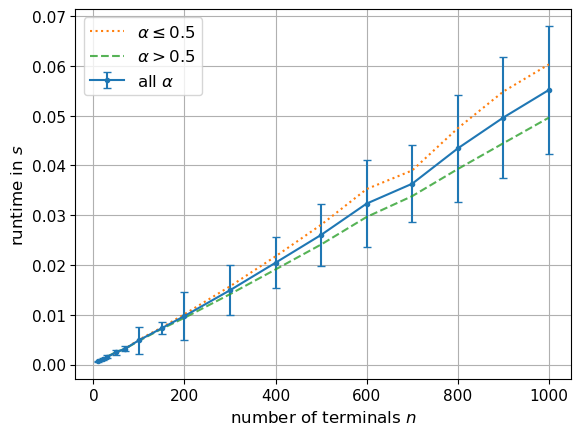

In [4]:
# plot the result:
mean_arr = np.zeros(len(num_terminals_list))
std_arr = np.zeros(len(num_terminals_list))
mean_low_arr = np.zeros(len(num_terminals_list))
mean_high_arr = np.zeros(len(num_terminals_list))

for i,num_terminals in enumerate(num_terminals_list):
    pkl_file_path = f"../results/output_files/geom_optimization_size{num_terminals}.pkl"
    pkl_file = open(pkl_file_path, 'rb')
    results_dict = pickle.load(pkl_file)
    pkl_file.close()
    
    mean_arr[i] = np.mean(results_dict["time_arr"])
    std_arr[i] = np.std(results_dict["time_arr"])
    mean_low_arr[i] = np.mean(results_dict["time_arr_low"])
    mean_high_arr[i] = np.mean(results_dict["time_arr_high"])
    
plt.errorbar(num_terminals_list, mean_arr, yerr=std_arr, fmt=".-", capsize=3, label="all $\\alpha$")

plt.plot(num_terminals_list, mean_low_arr, ":", label="$\\alpha \\leq 0.5$")
plt.plot(num_terminals_list, mean_high_arr, "--", label="$\\alpha > 0.5$", alpha = 0.8)

plt.grid()
plt.ylabel("runtime in $s$", fontsize=12)
plt.xlabel("number of terminals $n$", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=12)
# plt.savefig("geom_optimization_runtime.pdf")
plt.show()